In [11]:
# Install Required Libraries
!pip install matplotlib seaborn scikit-learn --quiet


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Synthetic dataset creation
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=100)
quantities = np.random.randint(10, 100, size=100)
price_per_unit = 20
revenue = quantities * price_per_unit
products = ['Product_A'] * 100

df = pd.DataFrame({
    'date': dates,
    'product': products,
    'quantity': quantities,
    'revenue': revenue
})

print(df.head())


        date    product  quantity  revenue
0 2024-01-01  Product_A        61     1220
1 2024-01-02  Product_A        24      480
2 2024-01-03  Product_A        81     1620
3 2024-01-04  Product_A        70     1400
4 2024-01-05  Product_A        30      600


In [4]:
# Convert date to datetime and create numeric feature
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()
daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days

# Check for nulls just in case
print(daily_sales.isnull().sum())


date                0
quantity            0
revenue             0
days_since_start    0
dtype: int64


In [5]:
X = daily_sales[['days_since_start']]
y = daily_sales['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: -0.051249695896627756
MSE: 233465.7374635067


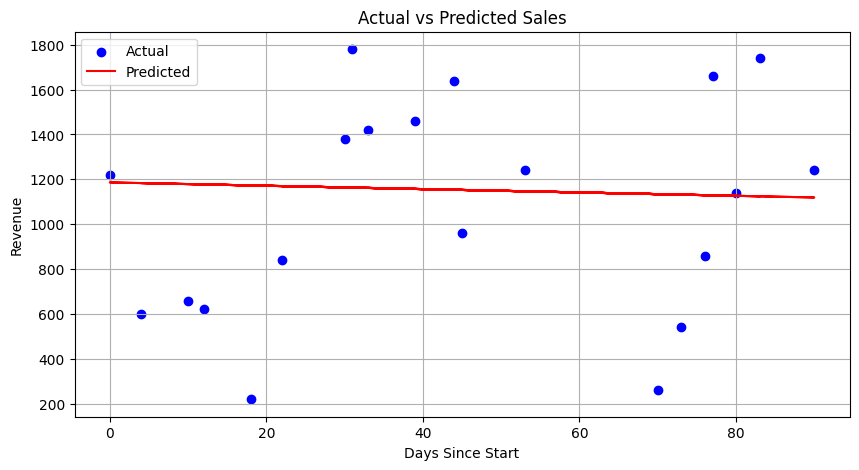

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Days Since Start')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Generate future dates
last_day = daily_sales['days_since_start'].max()
future_days = pd.DataFrame({'days_since_start': np.arange(last_day + 1, last_day + 31)})

# Predict future revenue
future_preds = model.predict(future_days)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'date': pd.date_range(start=daily_sales['date'].max() + pd.Timedelta(days=1), periods=30),
    'predicted_revenue': future_preds
})

print(forecast_df.head())


        date  predicted_revenue
0 2024-04-10        1111.721131
1 2024-04-11        1110.974352
2 2024-04-12        1110.227573
3 2024-04-13        1109.480794
4 2024-04-14        1108.734015


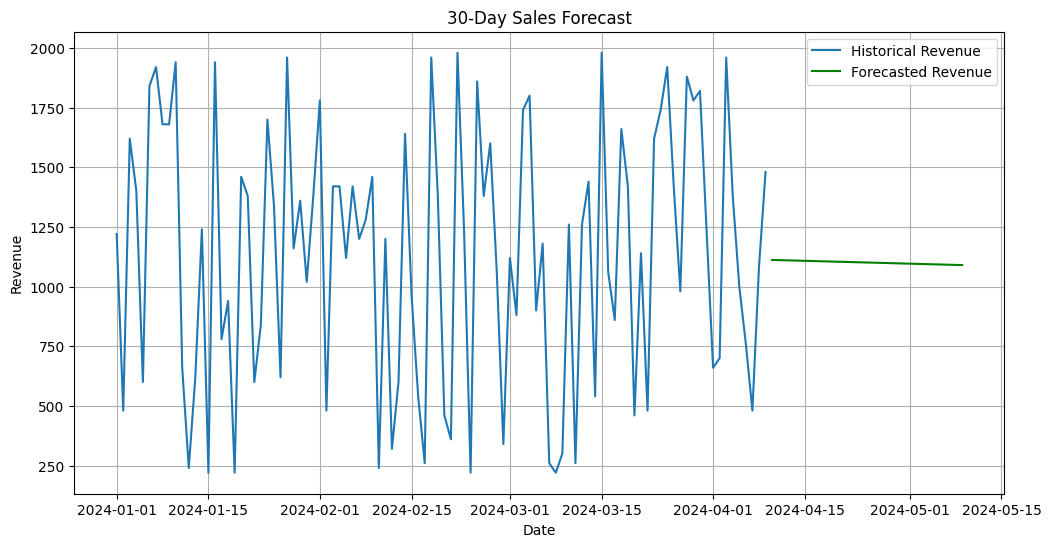

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['revenue'], label='Historical Revenue')
plt.plot(forecast_df['date'], forecast_df['predicted_revenue'], color='green', label='Forecasted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('30-Day Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()
